# Análisis tiempo frecuencia

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import csv
from matplotlib.colors import Normalize
import funciones_notebook as func

## Introducción
Utilizando la herramienta del enventanado, se puede hacer un análisis frecuencia. Este, puede llegar muy útil para obtener cierta información de una señal. Básicamente consiste en hacer un análisis de la señal por tramos, pero considerando la FFT de los mismos, además de la señal temporal. 
<br>
Veamos la señal de EOG que ya se ha visto en otros prácticos.

Text(0, 0.5, 'Amplitud (V)')

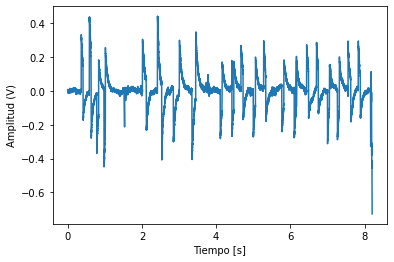

In [2]:
# Visualizacion del EOG
filename='Andres.csv'
t_list = []
sig_list = []
with open(filename, 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    i=0
    for row in spamreader:
        if i>=9:
            if len(row[1])>0:
                t_list.append(float(row[0]))
                sig_list.append(float(row[1]))
        i=i+1
t=np.array(t_list)
sig=np.array(sig_list)
plt.figure()
plt.plot(t, sig)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud (V)')

**Pregunta: retomando la pregunta que se hizo en la clase 11 de práctico, ¿qué información puede aportar un análisis espectral por tramos (análisis tiempo frecuencia) para esta señal?**
<br>
Respuesta:

## Ejemplo 1: mezcla y suma de senos
En este ejemplo se busca ilustrar que el análisis tiempo frecuencia puede dar información importante para cierto tipo de señales, en especial las que tienen ciertos comportamientos en frecuencia típicos en tramos de tiempo puntuales, como la señal de EOG. Esto se va a ver en el ejemplo que sigue a este, ahora se va a hacer un análisis tiempo frecuencia en una señal creada artificialmente para ejemplificar de forma clara la información que este análisis puede proporcionar.
<br>
Con el objetivo de contrastar una señal en la que el análisis tiempo frecuencia arroja información valiosa con otra que no, se va a trabajar con dos señales: una mezcla de senos y una suma de senos. 

Se trabajará con tres senos de frecuencias $1Hz$, $3Hz$ y $5Hz$. 
- La señal "suma de senos" va a calcularse como la suma de los mismos a lo largo de todo el eje de tiempo.
- La señal "mezcla de senos" va a ser una concatenación de los tres senos, es decir que cada seno aparece "solo" pero durante un tercio del eje de tiempo.


### Suma de senos

Text(0.5, 0, 't[s]')

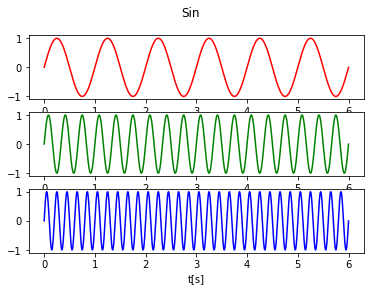

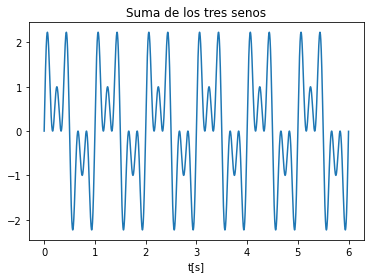

In [3]:
# Se define el eje de tiempo, las señales seno a utilizar y se calcula la suma de senos

# paso del eje de tiempo
dt = 0.0001
t = np.arange(0.0, 6.0, dt)

# Defino las frecuencias en Hz de los senos que voy a usar
f1 = 1
f2 = 3
f3 = 5

#---------------COMPLETAR CODIGO--------------------------------------------
# Defino los senos de diferentes frecuencias que voy a usar
# s1 = ...
# s2 = ...
# s3 = ...

# Calculo la suma de los tres senos
# suma_senos = ...

#-----------------FIN COMPLETAR CODIGO--------------------------------------

# Visualizar las senales seno
fig1, axs1 = plt.subplots(3)
fig1.suptitle('Sin')
axs1[0].plot(t, s1, 'r')
axs1[1].plot(t, s2, 'g')
axs1[2].plot(t, s3, 'b')
plt.xlabel('t[s]')

# Visualizo suma_senos
plt.figure(3)
plt.plot(t, suma_senos)
plt.title('Suma de los tres senos')
plt.xlabel('t[s]')

**Pregunta: ¿cree que un análisis tiempo frecuencia proporcionaría información en esta señal (suma de senos)?**

### Mezcla de senos
Ahora voy a construir la mezcla de los senos. Para ello voy a concatenar las tres senales en cuestión. Voy a dividir el eje de tiempo en 3 partes, y mediante pulsos, voy a ir "activando" las senales de a una. De esta forma, en cada una de estas fracciones de tiempo, solo se va a tener una de las tres senales.

<ipython-input-4-ed8afe69eb08>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n1 = np.int(np.floor(len(t) / 3.0))
<ipython-input-4-ed8afe69eb08>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for mo

Text(0.5, 0, 't[s]')

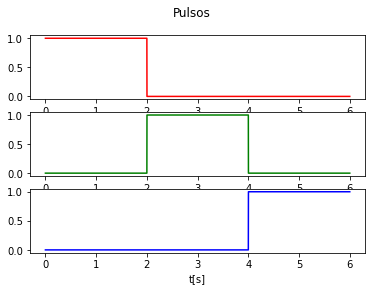

In [4]:
# Defino los pulsos prendidos en diferentes tiempos que voy a usar
nmax = len(t)
n1 = np.int(np.floor(len(t) / 3.0))
n2 = np.int(np.ceil(len(t) * 2.0 / 3))
p1 = np.concatenate([np.ones(n1), np.zeros(n2)])  # pulso 1
p2 = np.concatenate([np.zeros(n1), np.ones(n1), np.zeros(nmax-2*n1)])  # pulso 2
p3 = np.concatenate([np.zeros(n2), np.ones(n1)])  # pulso 3

fig2, axs2 = plt.subplots(3)
fig2.suptitle('Pulsos')
axs2[0].plot(t, p1, 'r')
axs2[1].plot(t, p2, 'g')
axs2[2].plot(t, p3, 'b')
plt.xlabel('t[s]')

**Pregunta: ¿en base a cómo quedaron definidos los pulsos, cuál es la duración de cada seno que se concatena?**

Text(0.5, 0, 't[s]')

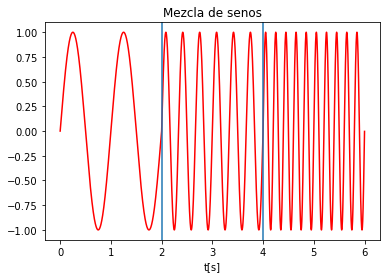

In [15]:
# Se calcula la mezcla de senos
#---------------COMPLETAR CODIGO--------------------------------------------
# Calculo la mezcla de los tres senos (usar los pulsos y las señales)
# mezcla_senos = ...

#-----------------FIN COMPLETAR CODIGO--------------------------------------
plt.figure()
plt.plot(t, mezcla_senos, 'r')
plt.axvline(t[int(len(t) / 3)], 0, 1)
plt.axvline(t[int(len(t) * (2/3))], 0, 1)
plt.title('Mezcla de senos')
plt.xlabel('t[s]')

### Análisis en frecuencia y comparación de las señales
Vamos a hacer la FFT de ambas señales usando todo el eje de tiempo.

Text(0.5, 0, '$f[Hz]$')

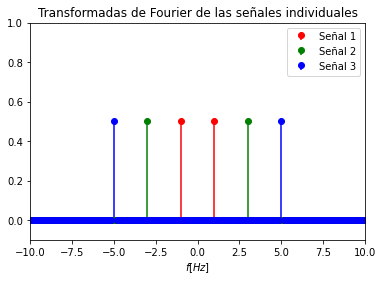

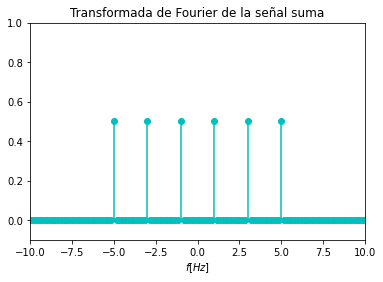

In [9]:
# FFT de la señal suma
# Construccion del eje de frecuencia
freq_ts = np.fft.fftfreq(t.shape[-1], d = dt)

# Calculo de las transformadas de cada una de las senales individuales
ts1 = np.fft.fft(s1) / len(s1)
ts2 = np.fft.fft(s2) / len(s2)
ts3 = np.fft.fft(s3) / len(s3)

# Transformada de la suma de las senales
tsuma_senos = np.fft.fft(suma_senos) / len(suma_senos)

color1 = 'r'
color2 = 'g'
color3 = 'b'

plt.figure(5)
plt.stem(freq_ts, abs(ts1), linefmt=f'{color1}-', markerfmt=f'{color1}o', basefmt=' ', use_line_collection=True, label = 'Señal 1')
plt.stem(freq_ts, abs(ts2), linefmt=f'{color2}-', markerfmt=f'{color2}o', basefmt=' ', use_line_collection=True, label = 'Señal 2')
plt.stem(freq_ts, abs(ts3), linefmt=f'{color3}-', markerfmt=f'{color3}o', basefmt=' ', use_line_collection=True, label='Señal 3')
plt.axis([-10, 10, -0.1, 1])
plt.title('Transformadas de Fourier de las señales individuales')
plt.legend()
plt.xlabel('$f[Hz]$')

color4 = 'c'
plt.figure()
plt.stem(freq_ts, abs(tsuma_senos), linefmt=f'{color4}-', markerfmt=f'{color4}o', basefmt=' ', use_line_collection=True)
plt.axis([-10, 10, -0.1, 1])
plt.title('Transformada de Fourier de la señal suma')
plt.xlabel('$f[Hz]$')

**Pregunta: ¿por qué los espectros de las dos gráficas mostradas son iguales?**


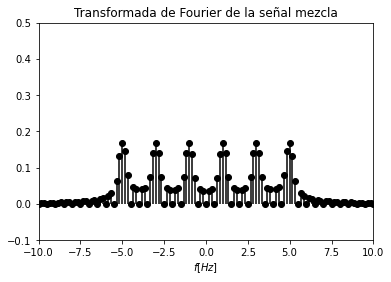

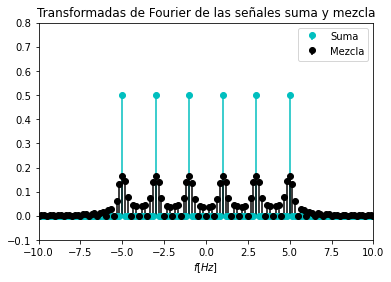

In [10]:
# FFT de la mezcla de senos y comparacion con suma
tmezcla_senos = np.fft.fft(mezcla_senos) / len(mezcla_senos)

color5 = 'k'
plt.figure()
plt.stem(freq_ts, abs(tmezcla_senos), linefmt=f'{color5}-', markerfmt=f'{color5}o', basefmt=' ', use_line_collection=True)
plt.axis([-10, 10, -0.1, 0.5])
plt.title('Transformada de Fourier de la señal mezcla')
plt.xlabel('$f[Hz]$')

plt.figure()
plt.stem(freq_ts, abs(tsuma_senos), linefmt=f'{color4}-', markerfmt=f'{color4}o', basefmt=' ', use_line_collection=True, label = 'Suma')
plt.stem(freq_ts, abs(tmezcla_senos), linefmt=f'{color5}-', markerfmt=f'{color5}o', basefmt=' ', use_line_collection=True, label = 'Mezcla')
plt.axis([-10, 10, -0.1, 0.8])
plt.title('Transformadas de Fourier de las señales suma y mezcla')
plt.xlabel('$f[Hz]$')
plt.legend()

**1) Analice similitudes y diferencias entre el espectro de frecuencia de la señal suma y mezcla.**
<br>
Respuesta:
<br>
**2) ¿Cuáles son las frecuencias principales presentes en cada señal?**
<br>
Respuesta:

Como se mencionaba anteriormente, para señales que cambian su comportamiento en frecuencia de forma marcada a lo largo del tiempo, como la señal mezcla, en interesante hacer un análisis tiempo frecuencia. Esto permite estudiar la señal por fragmentos, los cuales poseen características específicas. Se procede a hacer esto.
<br>
Solo por un tema de visualización, se va a trabajar con la suma y mezcla de senos de las mismas señales pero de una frecuencia 10 veces mayor. Es solo por cuestiones de visualización, no cambia en nada todo lo hecho hasta el momento.

In [12]:
# Suma y mezcla con senos de 10Hz, 30Hz y 50Hz
suma_senos, mezcla_senos = func.generar_suma_mezcla()

<ipython-input-13-f3471dbe31e0>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot(212, sharex=ax1)


(0.0, 100.0)

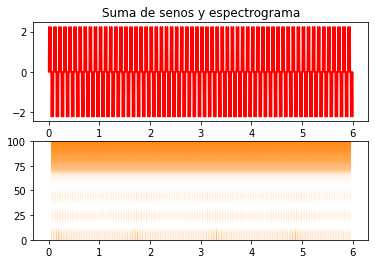

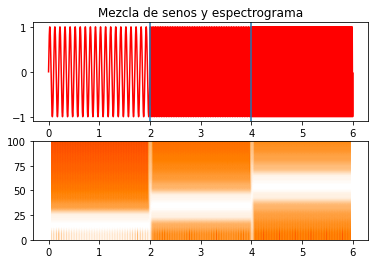

In [13]:
NFFT = 1024       # the length of the windowing segments
Fs = int(1.0/dt)
# Suma de senos
plt.figure(7)
ax1 = plt.subplot(211)
plt.plot(t, suma_senos, 'r')
plt.title('Suma de senos y espectrograma')
plt.subplot(212, sharex=ax1)
ax2 = plt.subplot(212, sharex=ax1)
plt.specgram(suma_senos, NFFT=NFFT, Fs=Fs, noverlap=900, cmap=plt.cm.gist_heat, scale='dB')
ax2.set_ylim([0, 100])

# Mezcla de senos
plt.figure(8)
ax1 = plt.subplot(211)
plt.plot(t, mezcla_senos, 'r')
plt.axvline(t[int(len(t) / 3)], 0, 1)
plt.axvline(t[int(len(t) * (2/3))], 0, 1)
plt.title('Mezcla de senos y espectrograma')
ax2 = plt.subplot(212, sharex=ax1)
plt.specgram(mezcla_senos, NFFT=NFFT, Fs=Fs, noverlap=900, cmap=plt.cm.gist_heat, scale='dB')
ax2.set_ylim([0, 100])

**Analice similitudes y diferencias entre el análisis tiempo frecuencia de la señal suma y mezcla. ¿Qué información puede extraer? ¿Agrega información con respecto a hacer la FFT en todo el eje de tiempo?**


## Ejemplo 2: EOG
Se procede a hacer al análisis tiempo frecuencia.

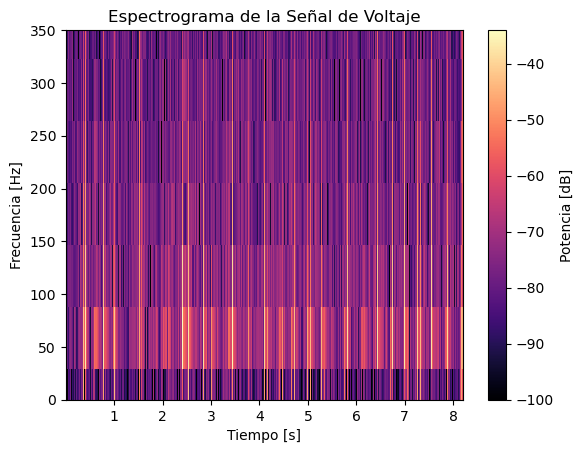

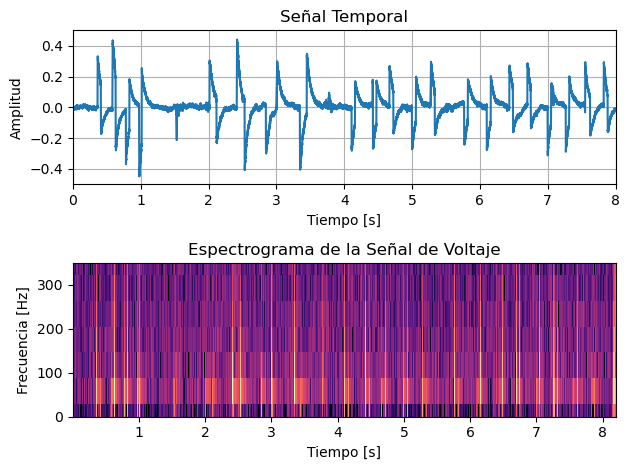

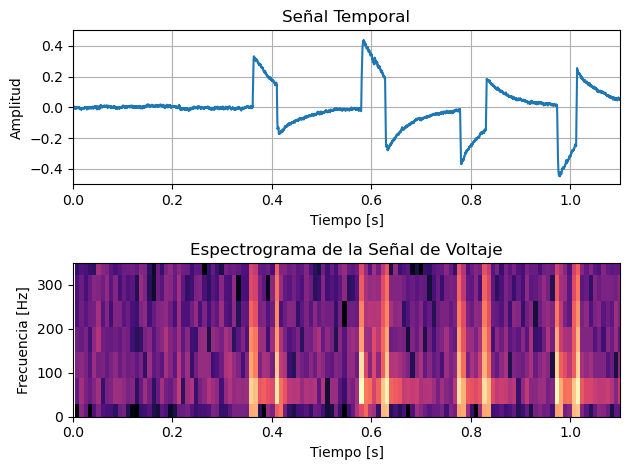

In [9]:
filename='Andres.csv'

t_list=[]
s_list = []

with open(filename, 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    i=0
    for row in spamreader:
        if i>=9:
            if len(row[1])>0:
                t_list.append(float(row[0]))
                s_list.append(float(row[1]))
                
        i=i+1
t = np.array(t_list)
s = np.array(s_list)

#plt.figure()
#plt.plot(t, s)

# Espectrograma
# Parámetros del espectrograma
window_size = 1024
overlap = 512
max_frequency = 350  # límite superior del eje de frecuencia

fs = 1/(t[1] - t[0])  # frecuencia de muestreo en Hz. Asumo frec de muestreo constante

# Calcular el espectrograma
frequencies, times, Sxx = signal.spectrogram(s, fs=fs, window='hann', nperseg=window_size, noverlap=overlap)

# Ajustar manualmente la escala para que la minima potencia sea -100 dB. Es para aprovechar mejor el eje.
Sxx[Sxx < -100] = -100

# Grafico del espectrograma solo
plt.figure()
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto',cmap='magma', vmin=-100)
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma de la Señal de Voltaje')
plt.ylim(0, max_frequency)  # Establecer el límite superior del eje de frecuencia
plt.colorbar(label='Potencia [dB]')


# Grafico senal temporal y espectrograma juntos
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.title('Señal Temporal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.axis([0, 8, -0.5, 0.5])
plt.grid()
# Crear un subplot para el espectrograma
plt.subplot(2, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='magma', vmin=-100)
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma de la Señal de Voltaje')
plt.ylim(0, max_frequency)  # Establecer el límite superior del eje de frecuencia

# Ajustar el diseño del subplot
plt.tight_layout()

# Grafico senal temporal y espectrograma juntos con zoom
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.title('Señal Temporal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.axis([0, 1.1, -0.5, 0.5])
plt.grid()
# Crear un subplot para el espectrograma
plt.subplot(2, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='magma', vmin=-100)
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma de la Señal de Voltaje')
plt.ylim(0, max_frequency)  # Establecer el límite superior del eje de frecuencia
plt.xlim(0, 1.1)  # Establecer el límite superior del eje de frecuencia

# Ajustar el diseño del subplot
plt.tight_layout()

**Pregunta: ¿en base a lo respondido en la sección introducción, el espectrograma es lo que esperaba? Explique**
<br>
Respuesta:
<br>
**Pregunta: ¿cree que el espectrograma aporta información útil? Explique**
<br>
Respuesta:
<br>
**Pregunta: ¿en qué aplicación piensa que podría usarse esta información?**
<br>
Respuesta: